In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(22)
df = pd.read_csv("data.csv")

In [2]:
df_num = df.select_dtypes(include = [np.number])
df_cat = df.select_dtypes(exclude = [np.number])
df_onehots = pd.get_dummies(df_cat.drop(['Attrition'], axis=1))
from sklearn.preprocessing import LabelEncoder
df_target= pd.DataFrame(LabelEncoder().fit_transform(df_cat['Attrition']))
df_target.columns = ["Attrition"]

from sklearn.preprocessing import StandardScaler as scaler
sc = scaler()
df_num_scaled = pd.DataFrame(sc.fit_transform(df_num), columns = df_num.columns)

x = pd.concat([df_num_scaled, df_onehots], axis = 1)
y = df_target

## tSNE

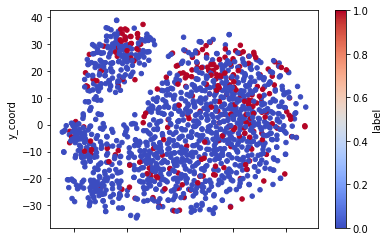

In [3]:
from sklearn.manifold import TSNE
np.random.seed(223)
mod = TSNE(n_components = 2).fit_transform(x)
plotdata = pd.concat([pd.DataFrame(mod), y], axis =1)
plotdata.columns = ['x_coord', 'y_coord', 'label']
plotdata.plot.scatter('x_coord', 'y_coord', c ='label', cmap = 'coolwarm')




# PCA 

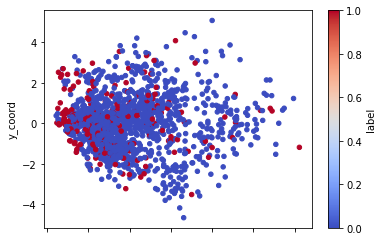

In [4]:
from sklearn.decomposition import PCA
mod = PCA(n_components = 2).fit_transform(x)
plotdata = pd.concat([pd.DataFrame(mod), y], axis =1)
plotdata.columns = ['x_coord', 'y_coord', 'label']
plotdata.plot.scatter('x_coord', 'y_coord', c ='label', cmap = 'coolwarm')

# kPCA


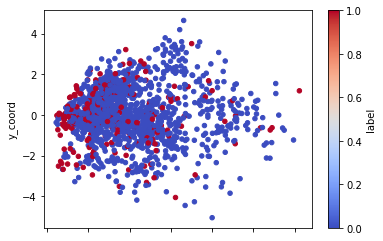

In [5]:
from sklearn.decomposition import KernelPCA as kPCA 
mod = kPCA(n_components = 2).fit_transform(x)
plotdata = pd.concat([pd.DataFrame(mod), y], axis =1)
plotdata.columns = ['x_coord', 'y_coord', 'label']
plotdata.plot.scatter('x_coord', 'y_coord', c ='label', cmap = 'coolwarm')

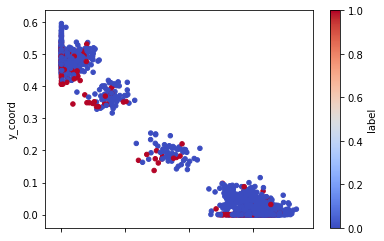

In [6]:
from sklearn.preprocessing import LabelEncoder
df_target= pd.DataFrame(LabelEncoder().fit_transform(df_cat['Attrition']))
df_target.columns = ["Attrition"]

from sklearn.preprocessing import MinMaxScaler as scaler
sc = scaler()
df_num_scaled = pd.DataFrame(sc.fit_transform(df_num), columns = df_num.columns)
x = pd.concat([df_num_scaled, df_onehots], axis = 1)



from sklearn.decomposition import NMF  

mod = NMF(n_components = 2).fit_transform(x)
plotdata = pd.concat([pd.DataFrame(mod), y], axis =1)
plotdata.columns = ['x_coord', 'y_coord', 'label']
plotdata.plot.scatter('x_coord', 'y_coord', c ='label', cmap = 'coolwarm')

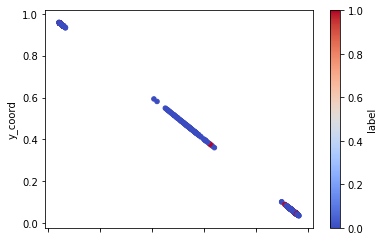

In [7]:
from sklearn.decomposition import LatentDirichletAllocation as LDA  
mod = LDA(n_components = 2, learning_method = 'online').fit_transform(x)
plotdata = pd.concat([pd.DataFrame(mod), y], axis =1)
plotdata.columns = ['x_coord', 'y_coord', 'label']
plotdata.plot.scatter('x_coord', 'y_coord', c ='label', cmap = 'coolwarm')

# ML

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_jobs=2, random_state=0)
classifier.fit(X_train, np.ravel(y_train)) 

y_pred = classifier.predict(X_test)

print("Training Accuracy = ", classifier.score(X_train, y_train))
print("Test Accuracy = ", classifier.score(X_test, y_test))



Training Accuracy =  0.9908536585365854
Test Accuracy =  0.8703703703703703


In [10]:
from sklearn.ensemble import GradientBoostingClassifier as gBoost
classifier = gBoost(n_estimators=70)
classifier.fit(X_train, np.ravel(y_train)) 

y_pred = classifier.predict(X_test)

print("Training Accuracy = ", classifier.score(X_train, y_train))
print("Test Accuracy = ", classifier.score(X_test, y_test))


Training Accuracy =  0.943089430894309
Test Accuracy =  0.8806584362139918


# XGBoost

In [11]:
#!pip install xgboost
from xgboost import XGBClassifier as xgb
from sklearn.metrics import accuracy_score
classifier = xgb(n_estimators = 80)
classifier.fit(X_train, np.ravel(y_train)) 
y_pred = classifier.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:',accuracy)

Accuracy: 0.8806584362139918


/home/gurra/coding/sklearn/test/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
